## MENTAL MODEL OF WEB - SCRAPPING
***

Typical flow of any web scrapping application (Script)
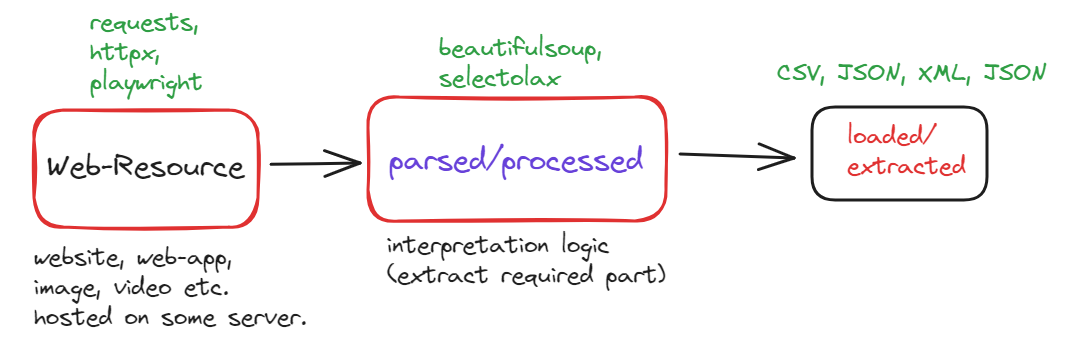

Note: **Playwright** - Headless Browser 

## HTTP
***
**HTTP - Hyper Text Transer Protocol**\
A comunication protocol that allows exhange of information between a client and a server.

HyperText : Text with links 

### Properties of HTTP 

**1. Request & Response**\
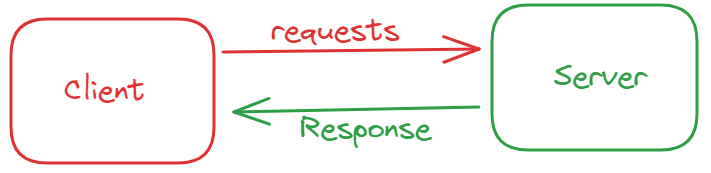\
Client initiates a request and a server responds to it.\
\
**2. Human Readable**
- HTTP is text-based.
- Easy to troubleshoot.

**3. Naturally extensible**
-   New functinality can be added using headers.etc as long as client agrees with the server.

Note: 
- Let say we send a GET request "www.google.com" the server will respond back with some text which will be rendered in our browser that's the google homepage.
- What the client sends is called request and what server sends back is called response each request-response cycle is stateless meaning a given request in HTTP by default independent of any other request. 

### STATE
***
    State
[ The condition of a system at a given time = History + Current input ]\

<p>We know that each HTTP request is stateless but then how does the server remembers the client?
(Like items added to a cart and move to other page etc.). Basicaly a websites remembers us when we browse from one page to another. How is this possible?</p>

When we browse from one page to the next we are not actually browsing from one resource to next without any context, in context of client server relation state is/or could be the information stored on the server which is associated with a given client, and this state is what allows a server to remember the client i.e browser cookie (geneated by the server and stored on client browser/user agent). 

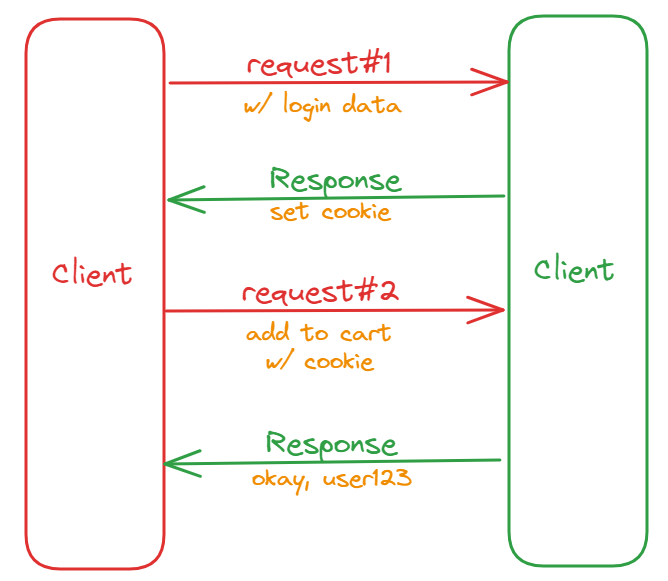

- User logs in with his username and password.
- Server then authenticats the user, generates a cookie and pass it back (has expiry date). This cookie uniquely identifies the client.
- Let's say **Request#2** is what only authenticated users can make then clients needs to pass that cookie to make that request.
  

### USER-AGENT
***
Software used to access a web resource on behalf of user (that why called agent) 
- Web browser 
- Crawler 
- Bot
- Python script (frame-work) etc. 

### HTTP Verbs
*** 
Type of action the client wants to perform ( Total ~ 39 Verbs)
- **GET:** Used to retrive a resource from the web. (Webpages, images, etc.) 
- **POST:** Create a new resource on the server. (Creating new account)
- **PUT:** Update resources in server (Example: User updating profile)
- **PATCH:** Update resource (but typically only partially)
- **DELETE:** Delete a resource on the server.

### STATUS CODE
***


Note: A client can send any request to a server, which server is obivously not obligated to honour and Whether the server respected the request is communicated via status code. 

Status code: Three digit number send back to the client, for each response.

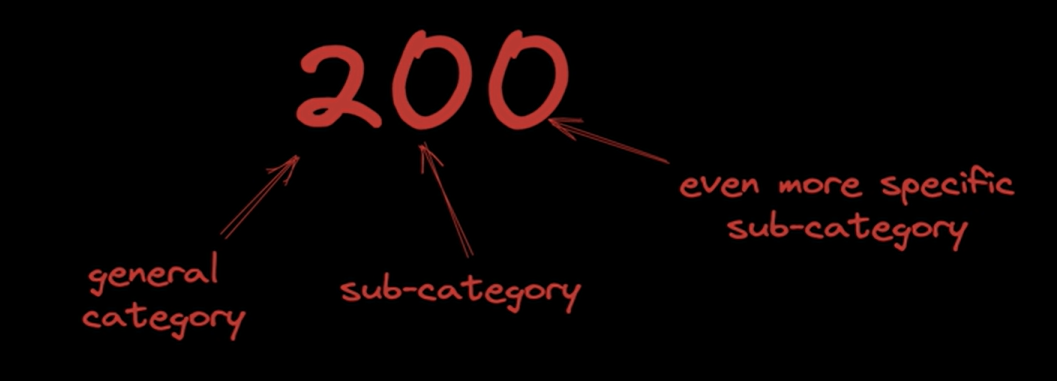

HTTPs status class 

- 100s Informational : Meant to provide additional information to the client about the request.
    - Ex: Switching Protocols

- 200s Success: Status response
    - 201 Created. 
    - 204 No content. 

- 300s Redirections 
    - 301 Moved permanently. 
    - 307 Temporary redirect.

- 400s Client Errors 
    - 404 Not found. 
    - 403 Forbidden.
    - 405 Method not allowed.

- 500s Server errors 
    - 500 Internal server error.
    - 502 Bad gateway. 



### HEADERS
*** 

HTTP is extensive (i.e the protocol allows the additon of other information to the request and response messages)\
Example:- using headers\
\
Headers play important role in identifying user-agent and discriminating against unwanted agents (ex: Web - scrappers) and favoring wanted agents.

Information : Google Crawler Bot

- Indexes websites to picked up in the google search. 
- Also useful for websites since it drives lot of traffic. 
( Google benifts from crawling the web and websites benefits by being crawled by the crawler)

Example: Financial Times - articles are behind the paywall which is accessible by the google crawler.

Use the below header:\
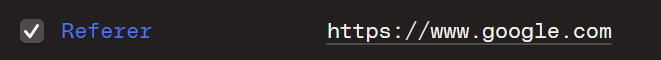



### Proxies
*** 

- An application-layer, intermediary server (sits between client and server) filter out the requests. 

1. Caching proxy 
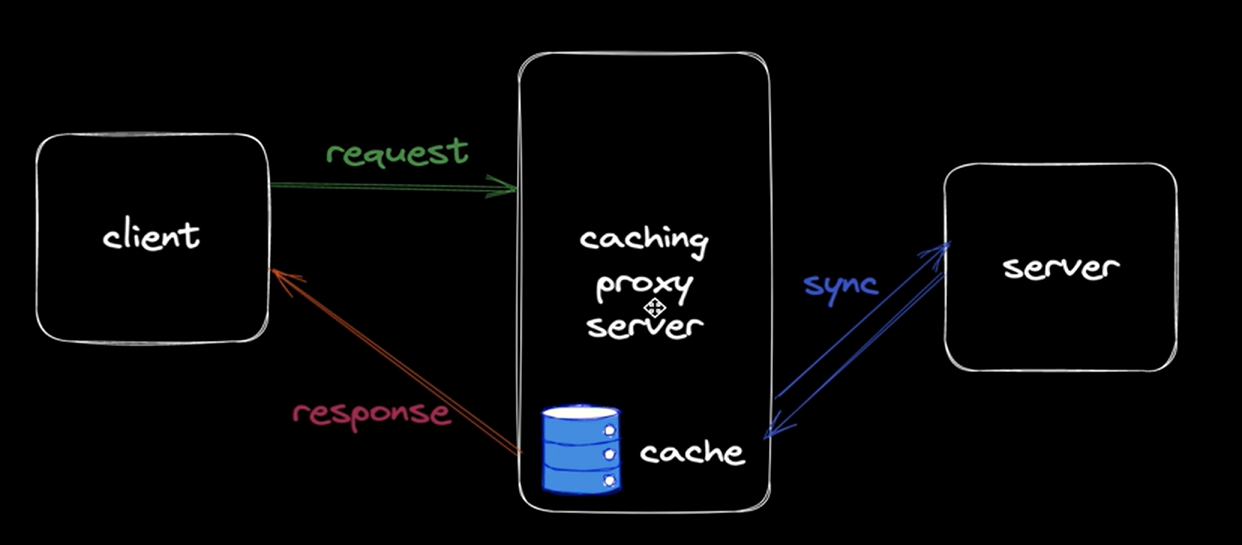
A server that stores the copy of response messages locally if a client makes a request and it has the response cached it will send it the client or else it will get it from the server and cache it for the next time.

2. Load balancing proxy 
A server which distributes the loads of incoming requests across multiple servers.\
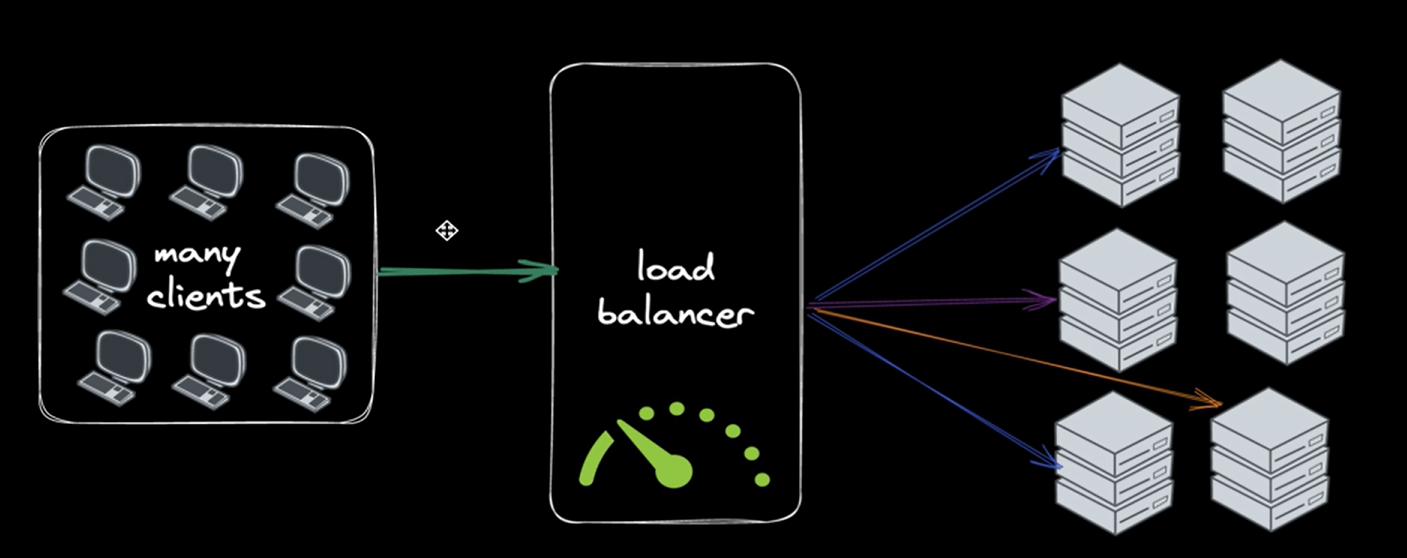

3. Scrapping proxies 
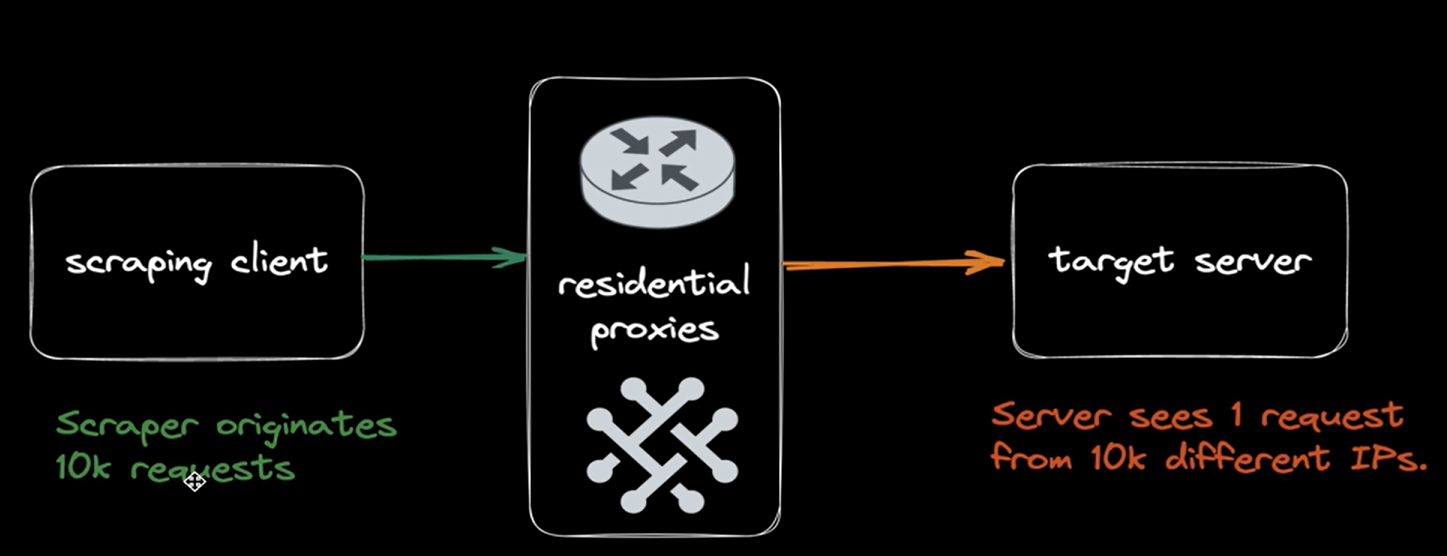



### HTML 
*** 

### Urllib
*** 


In [ ]:
from urllib.request import urlopen

url = "https://quotes.toscrape.com/" 

response = urlopen(url)

response.status

content = response.read()

content #Will return a byte strings (bytes). 

final = content.decode("utf-8") # Byte string to Unicode string (decoding)

print(final) # Printing the Unicode string in a formated manner.

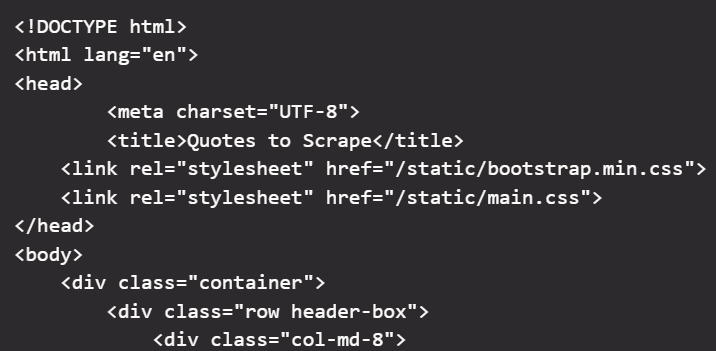

The above code can be written using resp as a context manager to make it smaller.

In [ ]:
with urlopen(url) as resp:
    content = resp.read()
    print(content.decode("utf-8"))

- Context managers\
A context manager in Python is a programming construct that allows you to manage resources, such as file handles, network connections, or locks, in a controlled and predictable manner. It ensures that resources are properly acquired and released, even in the presence of exceptions.

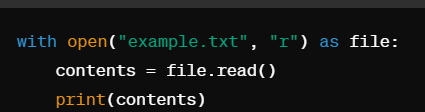

In this example, the open("example.txt", "r") function returns a file object, which acts as a context manager. The with statement ensures that the file is properly opened before entering the block and automatically closed after exiting the block, ensuring that resources are managed correctly.

### Requests 
*** 

In [ ]:
%pip install requests==2.28.2

In [ ]:
import requests

url = 'https://quotes.toscrape.com/'

resp = requests.get(url)

resp.content.decode("utf-8")

#OR (using text method to decode the byte string encoding)
resp.text

#Accessing the request headers 
resp.headers

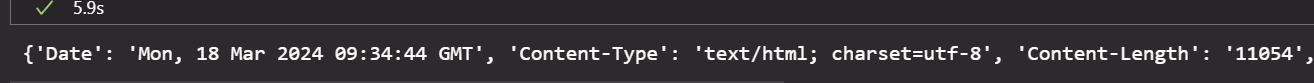

Response header is a special dictionary type data strcture where the keys are case insensitive. 
 

In [ ]:
resp.headers['Content-Type']

# OR

resp.headers['CONtent-TYPE'] # Are same

In [ ]:
resp = requests.get("https://httpbin.org/headers")

resp.json()